In [10]:
import numpy as np
import pandas as pd
import scipy as sp
import math
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from functools import partial

#csv = pd.read_csv('/Users/kylezhang/Num1/pythonProject1/data/raw/Train_and_Validate_EEG.csv')
#columns = csv.columns.drop("ID").drop("eeg.date")





In [2]:
from functools import partial

import numpy as np
import pandas as pd
import scipy as sp
import math
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

csv = None
csv = pd.read_csv('/Users/kylezhang/Num1/pythonProject1/data/raw/Train_and_Validate_EEG.csv', header=0)

print(len(csv))

# Drop the blank columns
csv = csv.dropna(axis=1, how='all')

# convert sex to binary encoding
csv["sex"] = csv['sex'].replace(['F','M'],[-1,1])

# Mean Imputation
csv["IQ"] = csv["IQ"].fillna(csv["IQ"].mean())
csv["education"] = csv["education"].fillna(csv["education"].mean())

# Make the X data
all_columns = csv.columns
x_columns = all_columns.drop("ID").drop("main.disorder").drop("specific.disorder").drop("eeg.date")
X = csv[x_columns]
#original_data = X[X.columns[:4]].reset_index(drop=True)
#combined_dataframe = pd.concat([original_data, X], axis=1, ignore_index=True)

# make the Y data
y = csv["main.disorder"]


# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

df1 = pd.read_csv('final_dataset_train_all.csv')
df3 = pd.read_csv('final_dataset_test_all.csv')
df1.columns = [i.lower() for i in df1.columns]
df3.columns = [i.lower() for i in df3.columns]
df2 = X_train.copy().iloc[:,4:]
df2.dropna(axis=1, how='all', inplace=True)
df2.columns = [i.lower() for i in df2.columns]
df2['main.disorder'] = y_train #this column is just there to make matching up the data set easier, it will be dropped later
X_train_split_model = X_train.copy().iloc[:,0:4] #we'll train and stack this model on top later
X_test_split_model_eeg = X_test.copy().iloc[:,4:] #we're splitting up the data set and matching it up with the data from the paper
X_test_split_model_eeg['main.disorder'] = y_test #this column is just there to make matching up the data set easier, it will be dropped later
X_test_split_model_non_eeg = X_test.copy().iloc[:,0:4] #for testing the stacked model
X_val_split_model_eeg = X_val.copy().iloc[:,4:] #we're splitting up the data set and matching it up with the data from the paper
X_val_split_model_eeg['main.disorder'] = y_val #this column is just there to make matching up the data set easier, it will be dropped later
X_val_split_model_non_eeg = X_val.copy().iloc[:,0:4] #for testing the stacked model

df2.columns = df1.columns
X_test_split_model_eeg.columns = df1.columns
X_val_split_model_eeg.columns = df1.columns
df = pd.concat([df1, df2, df3], axis=0)
df = df.drop_duplicates() #eliminate duplicate data after combining
y_train_df2 = y_train
y_train = df['main.disorder'].copy()
#df = df.copy().drop(columns=['main.disorder'])
#df2 = df2.copy().drop(columns=['main.disorder'])
#X_test_split_model_eeg = X_test_split_model_eeg.copy().drop(columns=['main.disorder'])
#X_val_split_model_eeg = X_val_split_model_eeg.copy().drop(columns=['main.disorder'])
means = []
stds = []
labels = []
mask = (df['main.disorder'] == 'Healthy control')
healthy_control_subset = df[mask]
healthy_control_subset = healthy_control_subset.copy().drop(columns=['main.disorder'])
df = df.copy().drop(columns=['main.disorder'])
df2 = df2.copy().drop(columns=['main.disorder'])
X_test_split_model_eeg = X_test_split_model_eeg.copy().drop(columns=['main.disorder'])
X_val_split_model_eeg = X_val_split_model_eeg.copy().drop(columns=['main.disorder'])
for column_name in df.columns:
  means.append(healthy_control_subset[column_name].mean())
  stds.append(healthy_control_subset[column_name].std())
  labels.append(column_name)

dfstats = pd.DataFrame([means,stds], columns=df.columns)
#X_train_split_model['age'] = X_train_split_model['age']**2
#X_train_split_model['education'] = np.log(X_train_split_model['education'])
#X_age = X_train_split_model['age']
_,fitted_lambda_age= sp.stats.yeojohnson(X_train_split_model['age'],lmbda=None)
X_train_split_model['age'] = X_train_split_model['age'].apply(lambda x: sp.stats.yeojohnson(x,fitted_lambda_age))
agemean = X_train_split_model['age'].mean()
agestd = X_train_split_model['age'].std()
_,fitted_lambda_education = sp.stats.yeojohnson(X_train_split_model['education'],lmbda=None)
X_train_split_model['education'] = X_train_split_model['education'].apply(lambda x: sp.stats.yeojohnson(x,fitted_lambda_education))
educationmean = X_train_split_model['education'].mean()
educationstd = X_train_split_model['education'].std()


852


/var/folders/l8/7yff8x5s739d6t19cjgdrlgr0000gn/T/ipykernel_33296/1159432141.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  csv["sex"] = csv['sex'].replace(['F','M'],[-1,1])


FileNotFoundError: [Errno 2] No such file or directory: 'final_dataset_train_all.csv'

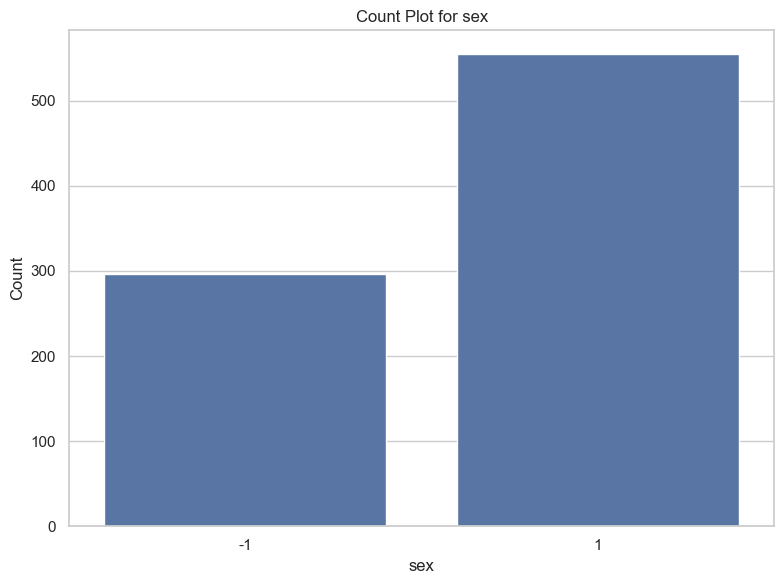

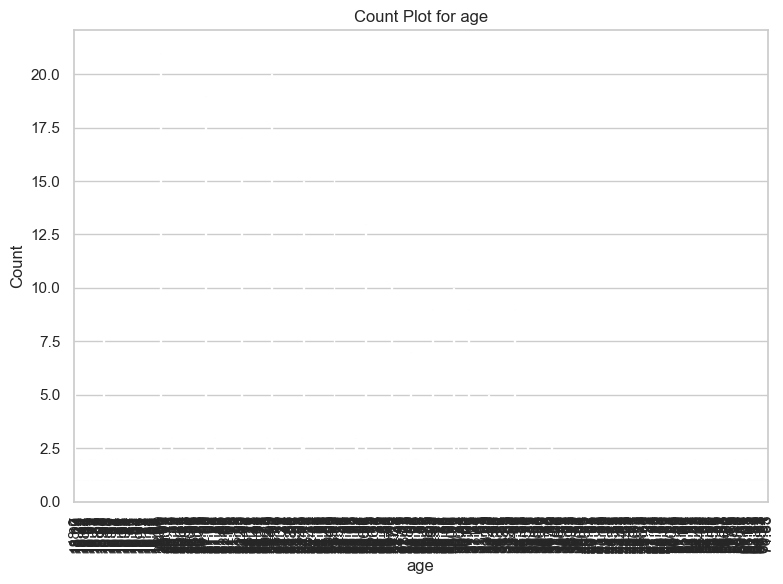

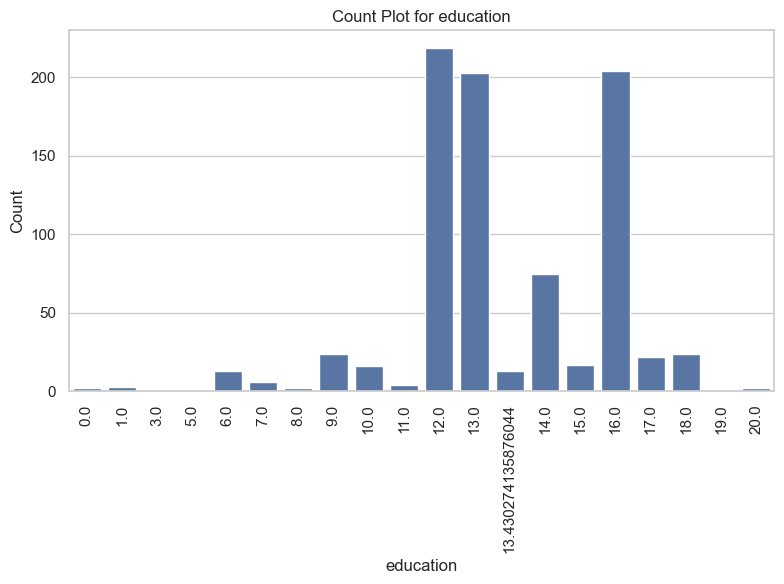

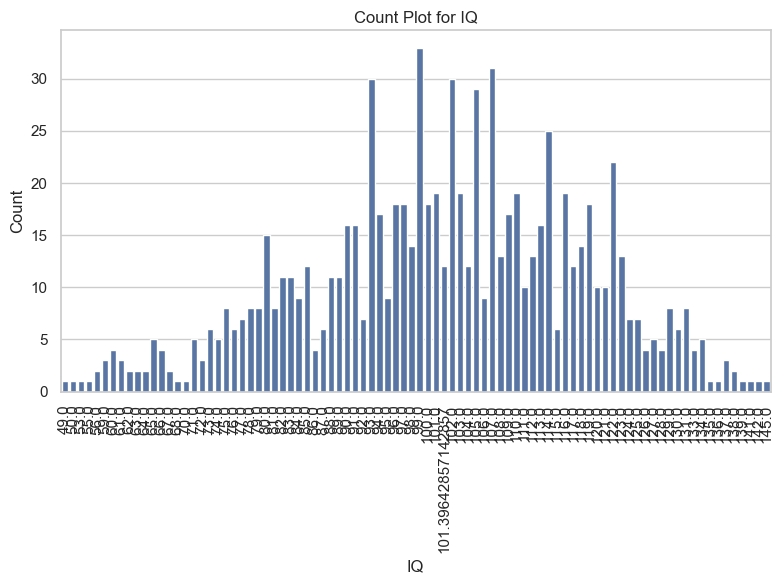

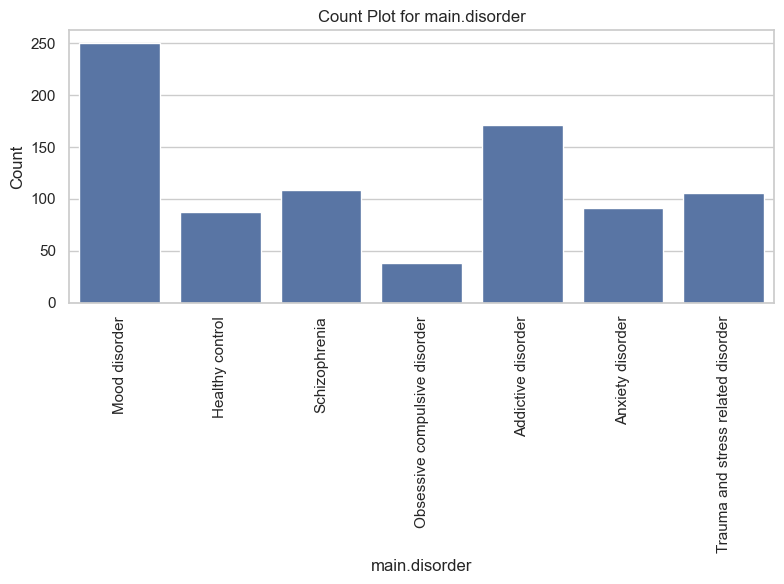

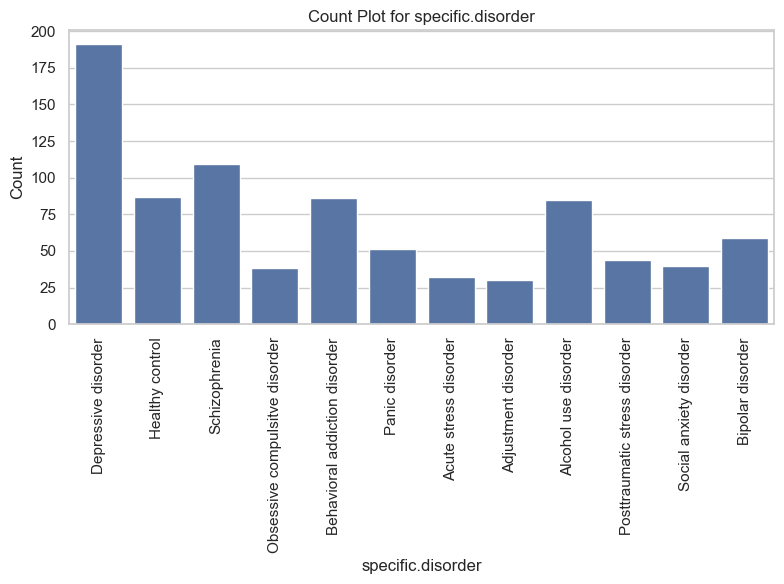

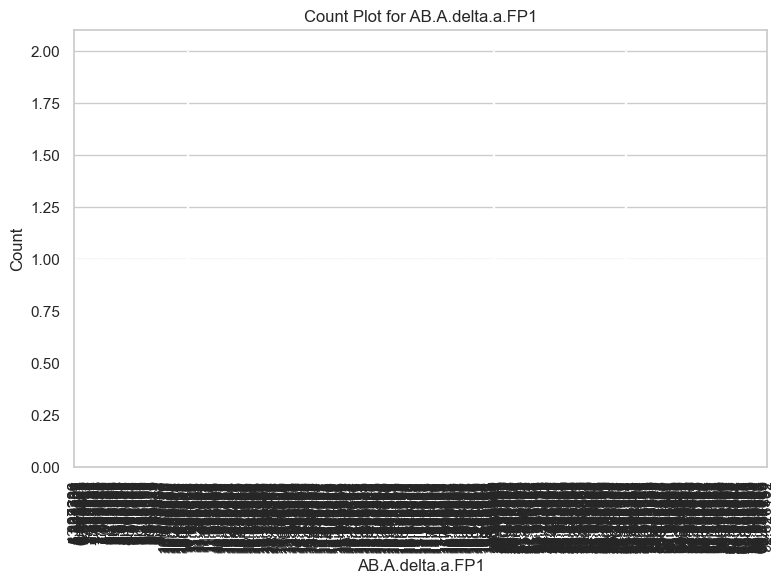

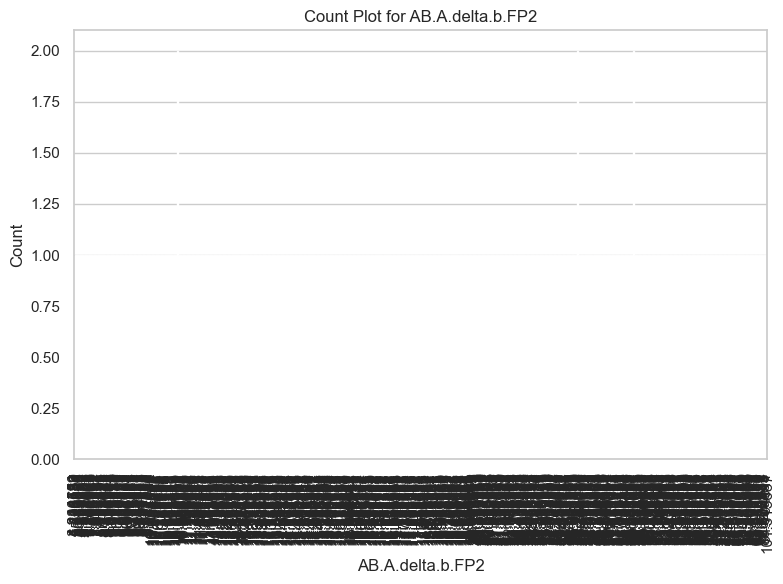

KeyboardInterrupt: 

In [12]:
colors = ['red', 'green', 'blue', 'yellow']
sns.set_theme(style="whitegrid")
for col in columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=csv)
    # Rotate x-axis labels if the column is not "sex" (adjust as needed)
    if col != "sex":
        plt.xticks(rotation=90)
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

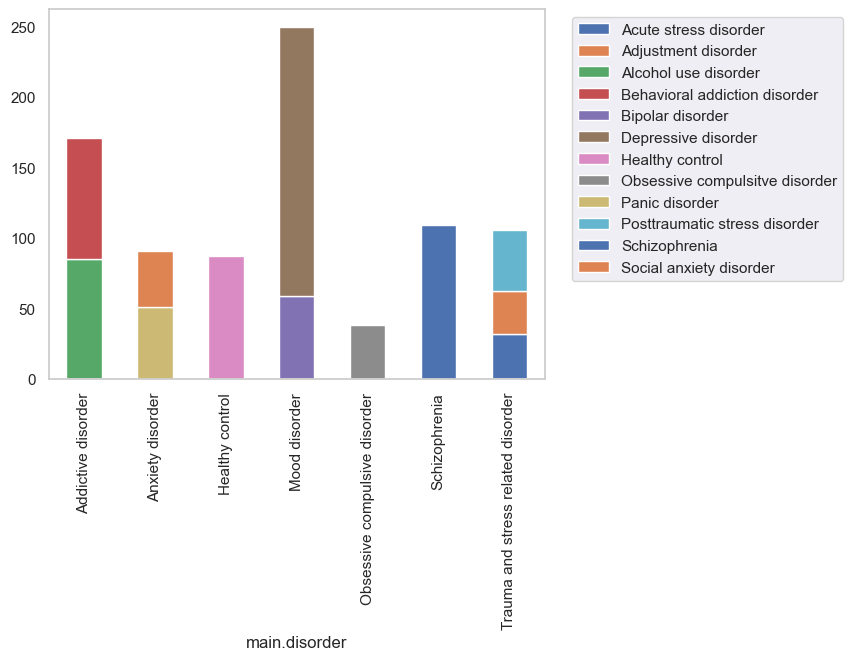

In [31]:
fig,ax = plt.subplots()
sns.set_theme(style="dark")
disorder_counts = csv.groupby(['main.disorder', 'specific.disorder']).size()
disorder_counts.unstack('specific.disorder')\
    .plot(kind='bar', stacked=True, ax=ax)
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

In [34]:
combined_data = csv.iloc[:, 8:27].values.flatten()
mean = np.mean(combined_data)
variance = np.var(combined_data)
print(f"Mean: {mean}")
print(f"Variance: {variance}")

combined_data = csv.iloc[:, 27:46].values.flatten()
mean = np.mean(combined_data)
variance = np.var(combined_data)
print(f"Mean: {mean}")
print(f"Variance: {variance}")

combined_data = csv.iloc[:, 46:65].values.flatten()
mean = np.mean(combined_data)
variance = np.var(combined_data)
print(f"Mean: {mean}")
print(f"Variance: {variance}")

combined_data = csv.iloc[:, 65:84].values.flatten()
mean = np.mean(combined_data)
variance = np.var(combined_data)
print(f"Mean: {mean}")
print(f"Variance: {variance}")

Mean: 16.370538944650356
Variance: 95.3821476612612


In [33]:
 csv.iloc[:, 27:46]

,AB.B.theta.a.FP1,AB.B.theta.b.FP2,AB.B.theta.c.F7,AB.B.theta.d.F3,AB.B.theta.e.Fz,AB.B.theta.f.F4,AB.B.theta.g.F8,AB.B.theta.h.T3,AB.B.theta.i.C3,AB.B.theta.j.Cz,AB.B.theta.k.C4,AB.B.theta.l.T4,AB.B.theta.m.T5,AB.B.theta.n.P3,AB.B.theta.o.Pz,AB.B.theta.p.P4,AB.B.theta.q.T6,AB.B.theta.r.O1,AB.B.theta.s.O2
0,18.630236,18.303788,13.633757,22.041501,25.790113,25.823262,13.680359,10.190899,20.473551,30.154422,25.027903,12.188625,10.544821,19.384536,22.597816,23.200392,13.533117,15.825976,15.966236
1,10.733311,10.925079,6.613441,13.709309,15.116406,13.940799,9.737385,4.203904,10.596295,17.227815,11.306894,6.655920,2.708754,7.119652,11.729084,9.043931,5.621380,4.285572,5.030498
2,19.850235,23.856276,17.192334,27.821940,23.748798,28.188047,17.034603,11.359047,21.223044,26.626620,20.414093,11.520957,16.988892,25.491464,16.086267,22.636364,21.175125,15.842268,12.984553
3,7.162396,6.238748,5.580928,7.778670,8.253590,6.514957,4.101726,4.261923,5.598839,7.597268,5.394982,2.773955,2.748056,4.125226,4.755808,4.013686,2.505890,3.014734,3.493275
4,21.504535,20.500971,18.979308,27.082688,27.486381,20.751768,14.354886,13.017812,21.256323,25.306429,21.499880,12.782457,10.917875,16.350040,18.791158,17.131770,11.039663,11.867855,10.075369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,13.933161,13.571850,7.966899,13.132145,17.836374,14.810302,9.291721,4.580396,8.576046,10.707775,10.034335,6.124027,3.596759,7.243075,8.184558,8.352654,5.735295,4.247094,3.525971
848,10.010031,12.308585,7.845604,16.138906,14.159804,18.262581,10.427668,7.107656,11.541728,13.789083,14.267159,9.383374,3.142005,11.816145,8.564727,17.395438,6.572564,5.593130,7.371473
849,10.931007,6.452553,4.626529,7.723620,10.294436,8.058488,3.346537,2.926677,8.548068,9.972517,7.346086,2.742076,5.409788,8.085100,5.707516,5.797445,5.905993,5.156332,3.512715
850,33.324054,29.545353,24.762565,33.244126,37.213638,39.148094,30.127781,23.975158,26.316786,31.819805,29.623892,23.615658,14.505954,20.574399,26.232349,24.487906,15.554268,14.637692,16.054643


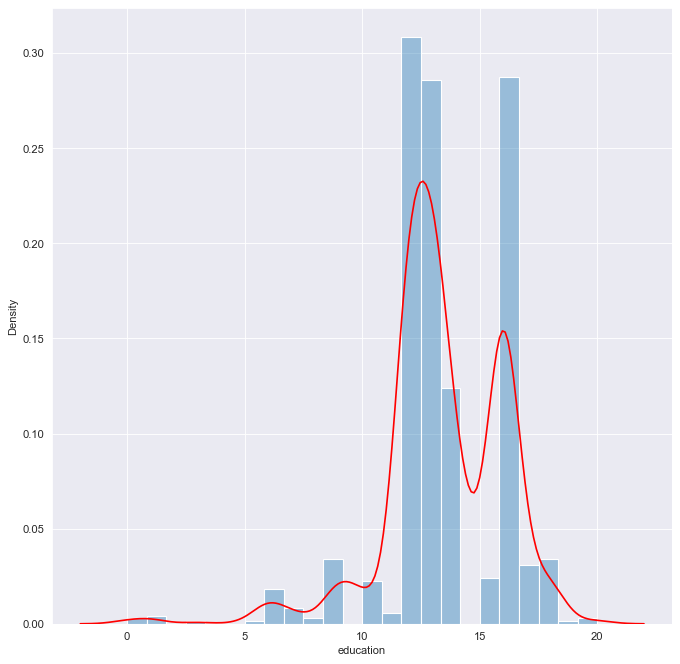

In [8]:
plt.figure(figsize=(10, 10), dpi=80)

for con in columns[2:3]:
    ax = sns.histplot(x = con, data = csv,kde=False,alpha=0.4, stat='density')
    sns.kdeplot(data=csv, x=con, color='red', ax=ax)
    plt.show()

<Figure size 300x300 with 0 Axes>

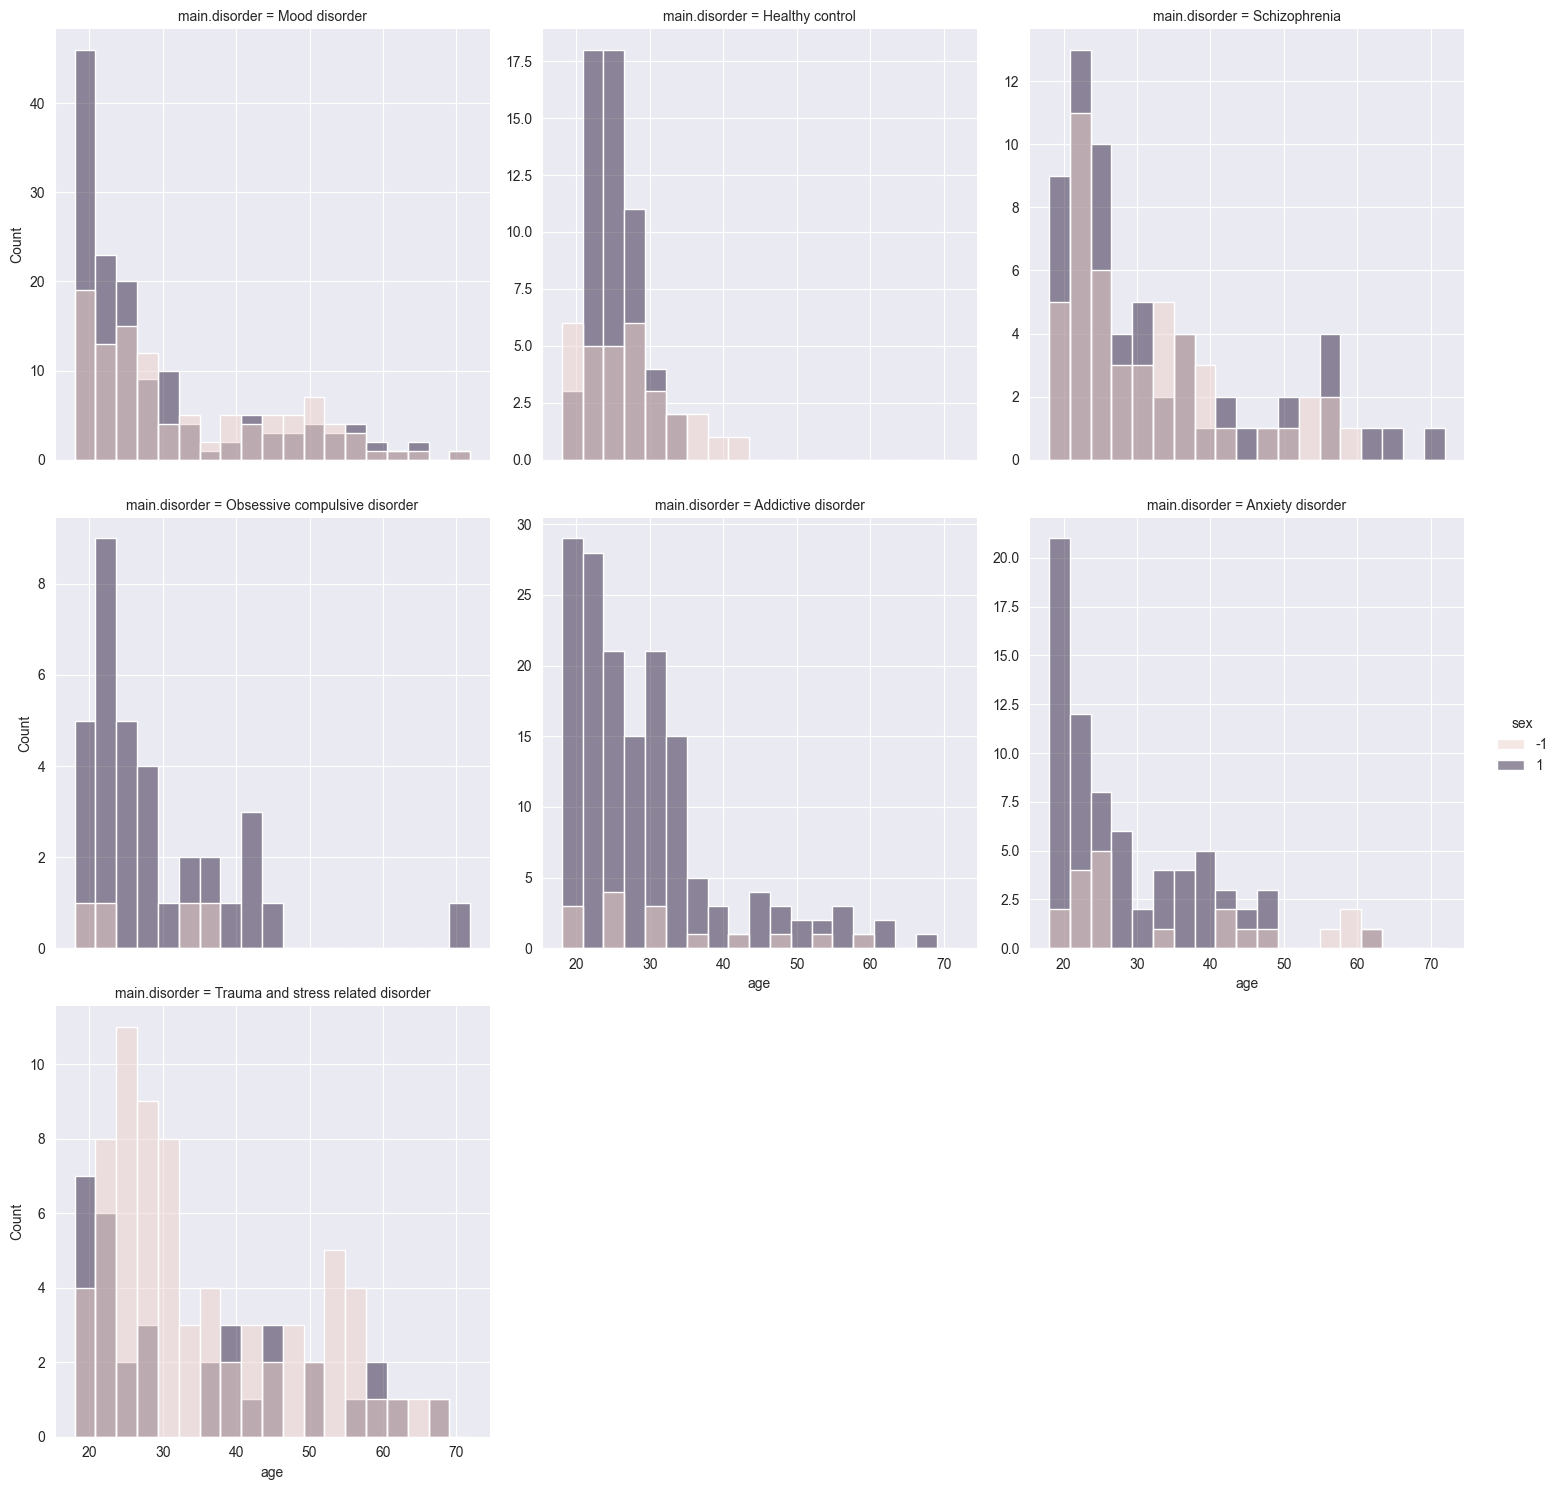

In [4]:
info = csv.loc[:,'sex':'main.disorder']
displot = partial(sns.displot,
                  data=info, kind='hist',
                  col_wrap=3,facet_kws={'sharey': False})

plt.figure(figsize=(3,3))
displot(x='age', col='main.disorder', hue = 'sex')
plt.show()

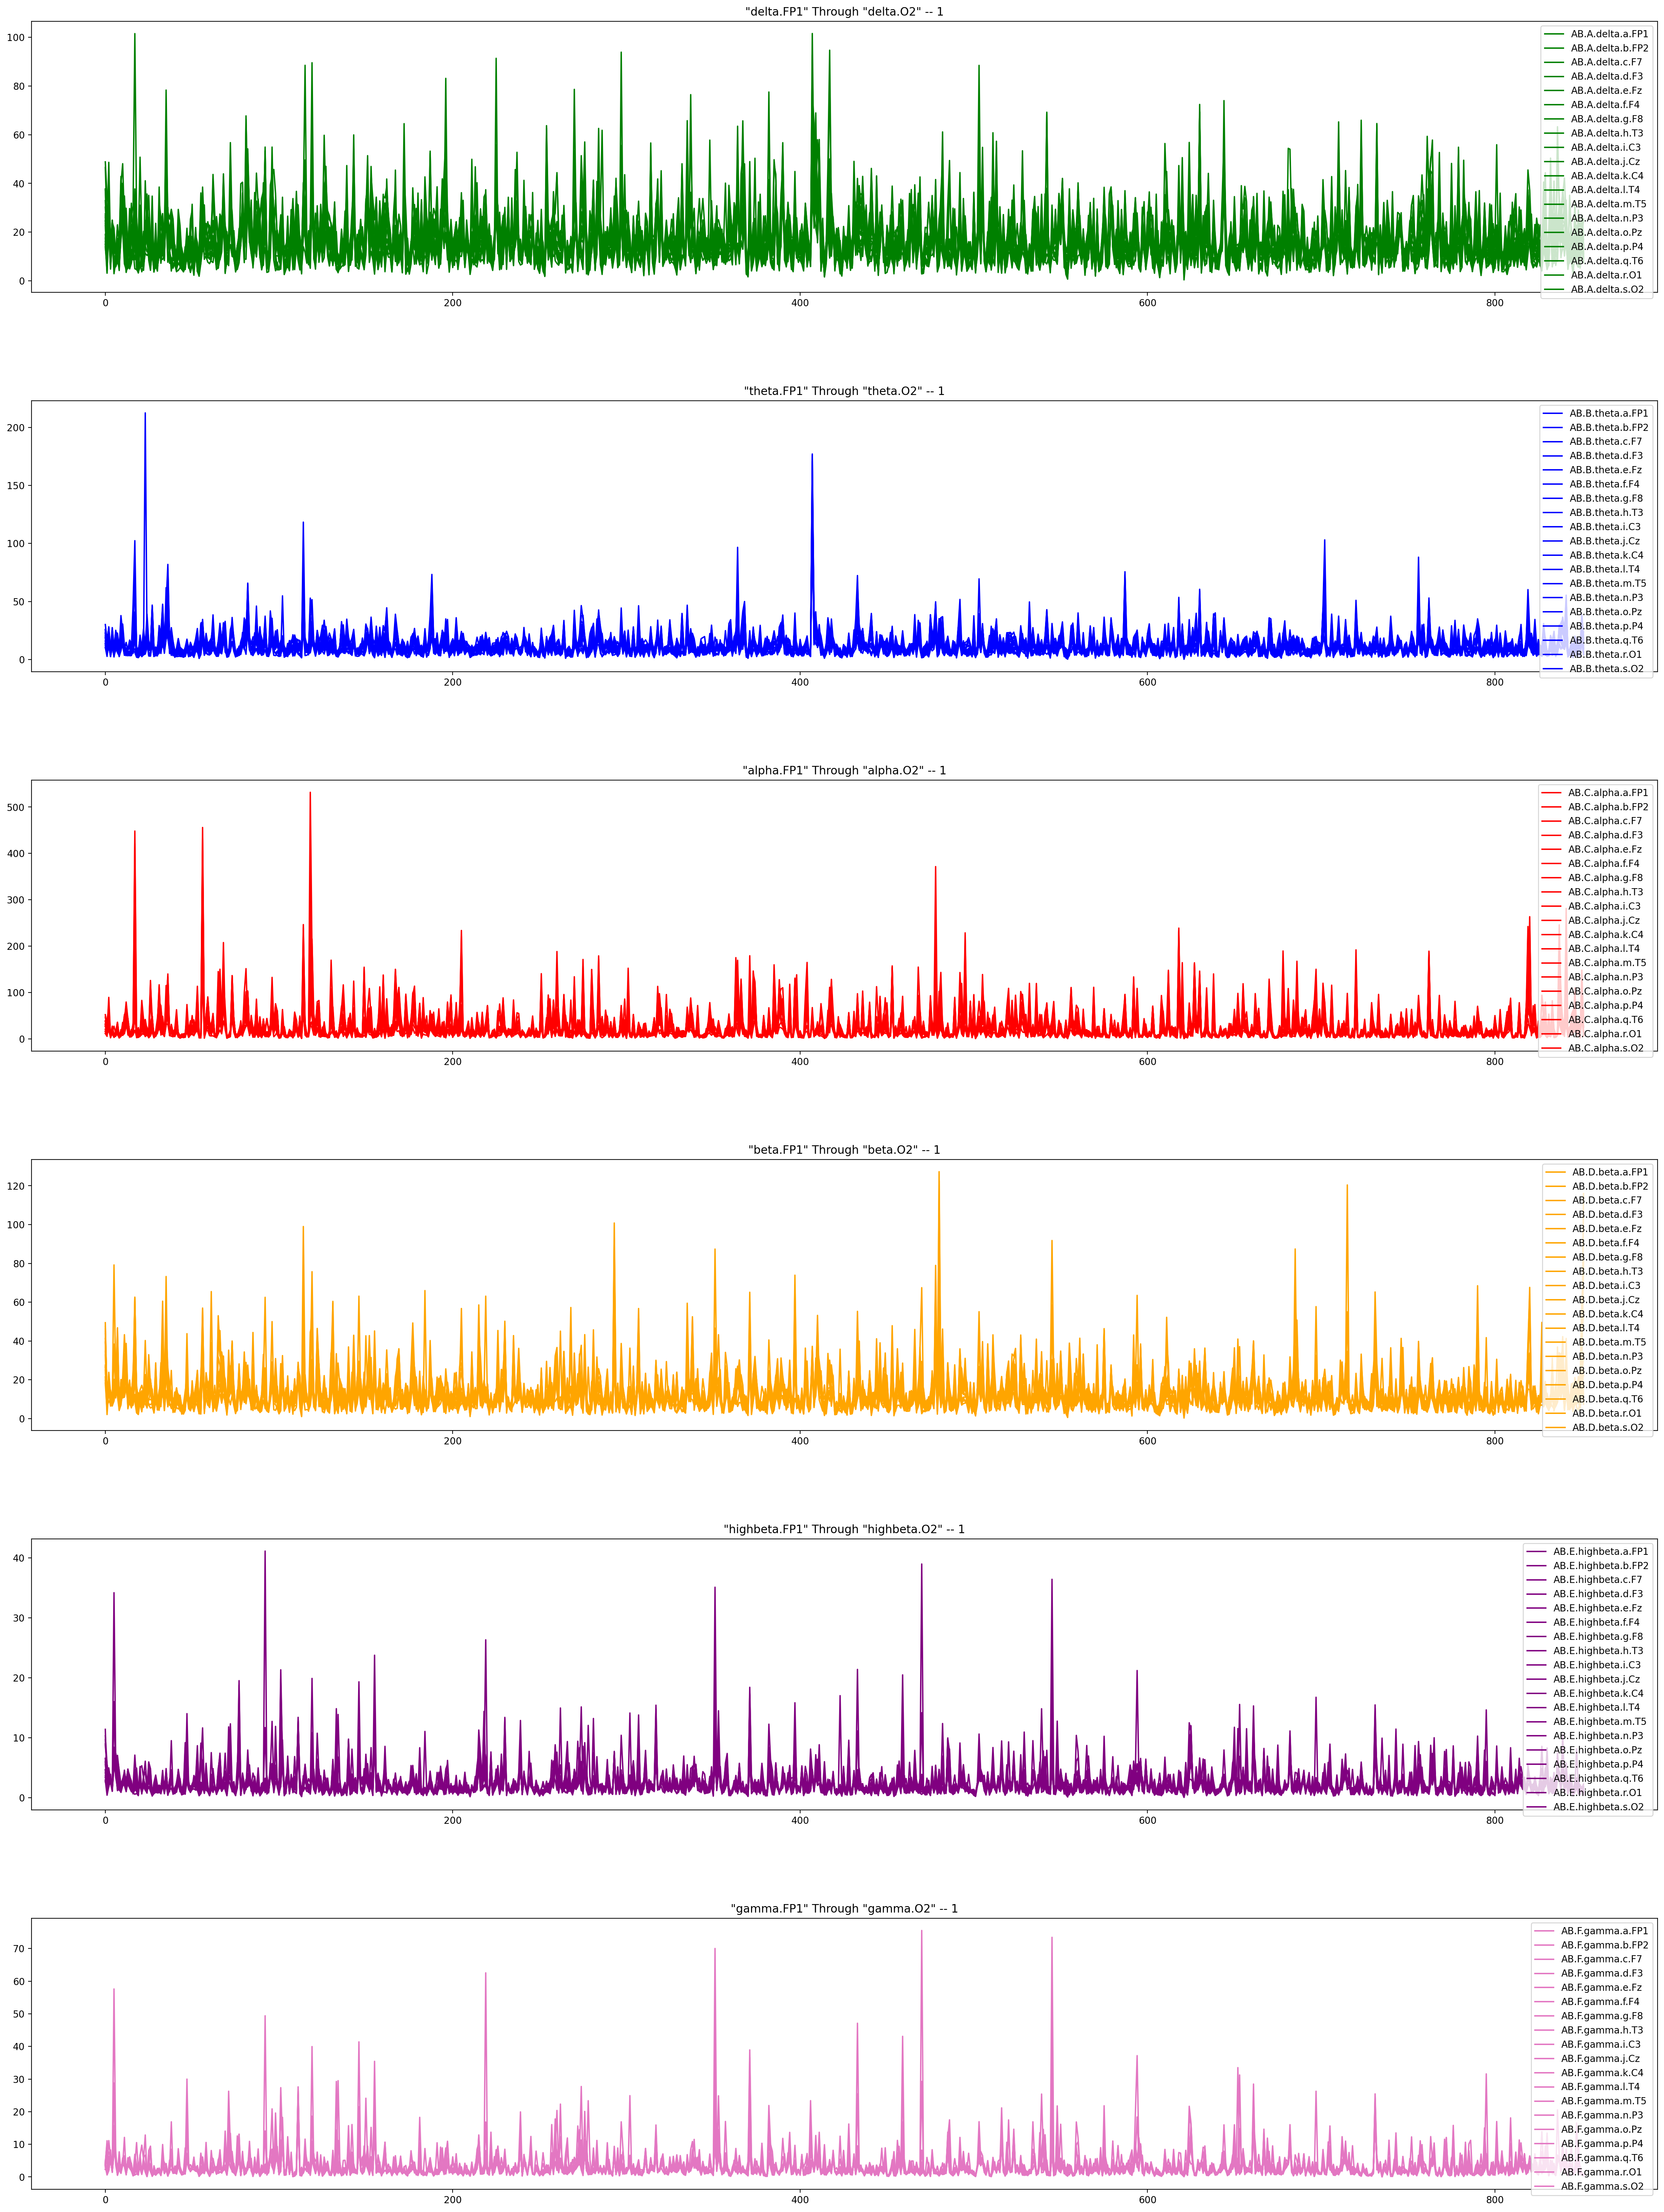

In [52]:
fig, axes = plt.subplots(nrows=6, ncols=1, dpi=200, figsize=(30, 40))

# all bands plot
csv.loc[:, 'AB.A.delta.a.FP1':'AB.A.delta.s.O2'].plot(title='\"delta.FP1\" Through \"delta.O2\" -- 1', color='green', ax=axes[0])
csv.loc[:, 'AB.B.theta.a.FP1':'AB.B.theta.s.O2'].plot(title='\"theta.FP1\" Through \"theta.O2\" -- 1', color='blue', ax=axes[1])
csv.loc[:, 'AB.C.alpha.a.FP1':'AB.C.alpha.s.O2'].plot(title='\"alpha.FP1\" Through \"alpha.O2\" -- 1', color='red', ax=axes[2])
csv.loc[:, 'AB.D.beta.a.FP1':'AB.D.beta.s.O2'].plot(title='\"beta.FP1\" Through \"beta.O2\" -- 1', color='orange', ax=axes[3])
csv.loc[:, 'AB.E.highbeta.a.FP1':'AB.E.highbeta.s.O2'].plot(title='\"highbeta.FP1\" Through \"highbeta.O2\" -- 1', color='purple', ax=axes[4])
csv.loc[:, 'AB.F.gamma.a.FP1':'AB.F.gamma.s.O2'].plot(title='\"gamma.FP1\" Through \"gamma.O2\" -- 1', color='tab:pink', ax=axes[5])


plt.subplots_adjust(left=0.1, bottom=0.1,
                    right=0.9, top=0.9,
                    wspace=0.4, hspace=0.4)
plt.savefig('signal.png', bbox_inches='tight')
plt.show()